After building a dictionary of roots and their associated words, we compute the pairwise distances between all words within each root family using a word embedding model.
For each root, we calculate the average distance across all word pairs.
To reduce noise, roots with fewer than 10 associated words are excluded from this analysis.

In [ ]:
import numpy as np
import pickle
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def calculate_semantic_coherence(root_to_words, model, threshold=10):
    """
    Calculate semantic coherence for each root in the dictionary.
    """
    semantic_coherence = {}

    for root, words in root_to_words.items():
        if len(words) < threshold:
            continue  # Skip roots with fewer words than the threshold

        distances = []
        for i in range(len(words)):
            for j in range(i + 1, len(words)):
                try:
                    distance = model.wv.distance(words[i], words[j])
                    distances.append(distance)
                except KeyError:
                    continue

        if distances:
            average_distance = np.mean(distances)
            semantic_coherence[root] = average_distance

    return semantic_coherence

def main():
    # Load the dictionary and the word2vec model
    dictionary_path = "data_files/updated_main_corpus_root_to_words_dict.pkl"
    model_path = "data_files/models/main_corpus_word2vec.model"
    output_path = "data_files/models/main_corpus_semantic_coherence_results.txt"

    print("Loading dictionary and word2vec model...")
    with open(dictionary_path, "rb") as file:
        root_to_words = pickle.load(file)

    model = Word2Vec.load(model_path)

    # Calculate semantic coherence
    print("Calculating semantic coherence...")
    semantic_coherence = calculate_semantic_coherence(root_to_words, model, threshold=5)

    # Save the results to a file
    print("Saving semantic coherence results to file...")
    with open(output_path, "w", encoding="utf-8") as file:
        for root, coherence in semantic_coherence.items():
            file.write(f"Root: {root}, Semantic Coherence: {coherence}\n")

    print(f"Semantic coherence results saved to {output_path}")

if __name__ == "__main__":
    main()


In [6]:
def load_semantic_coherence(file_path):
    roots = []
    coherences = []
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            root, coherence = line.strip().split(", ")
            roots.append(root.split(": ")[1])
            coherences.append(float(coherence.split(": ")[1]))
    return roots, coherences
roots, coherences = load_semantic_coherence("/home/safeer.alyubary/Semantic-Coherence/data_files/models/main_corpus_semantic_coherence_results.txt")

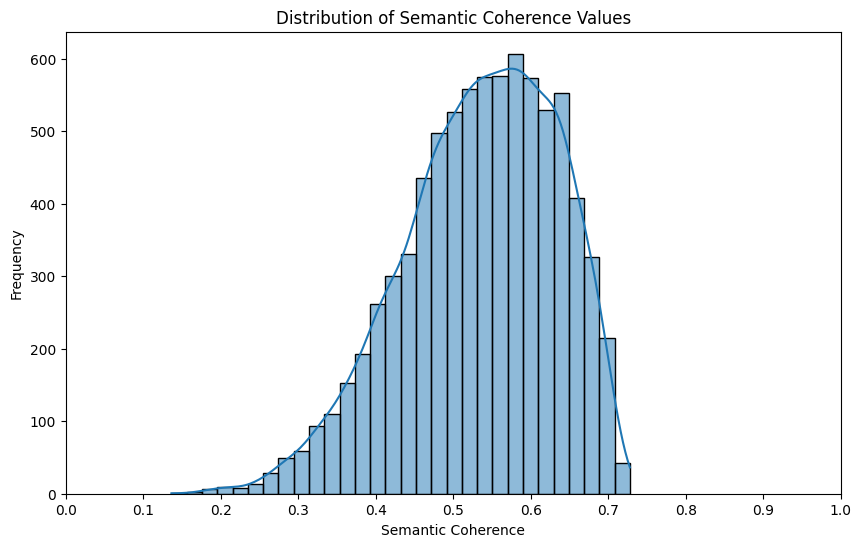

In [7]:

def plot_histogram(coherences):
    plt.figure(figsize=(10, 6))
    sns.histplot(coherences, kde=True, bins=30)
    plt.title('Distribution of Semantic Coherence Values')
    plt.xlabel('Semantic Coherence')
    plt.ylabel('Frequency')
    plt.xticks([i/10 for i in range(11)])
    plt.show()
plot_histogram(coherences)

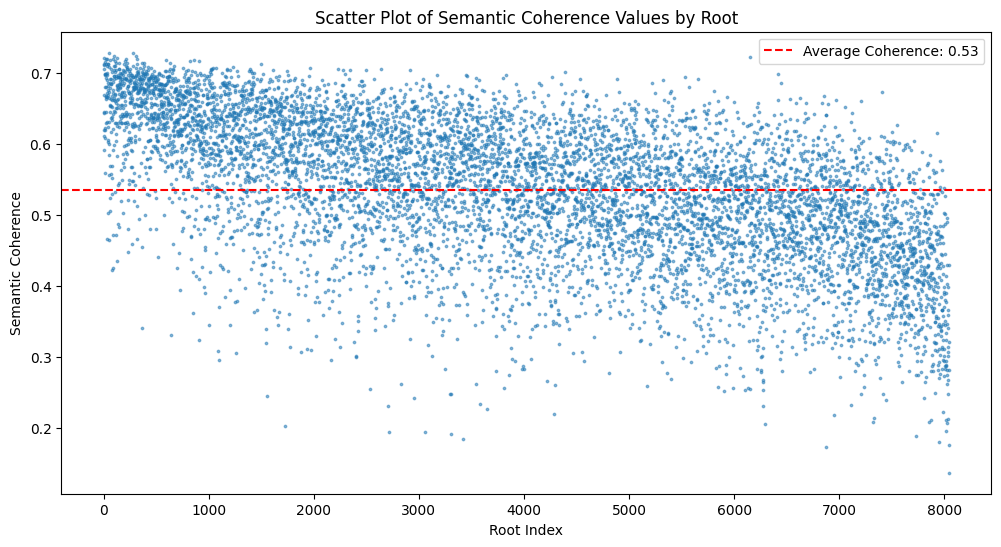

In [10]:
import numpy as np
def plot_scatter_with_average(roots, coherences):
    plt.figure(figsize=(12, 6))
    
    # Reduce point size and add transparency
    plt.scatter(range(len(coherences)), coherences, alpha=0.5, s=3)
    
    # Calculate and plot the average coherence
    avg_coherence = np.mean(coherences)
    plt.axhline(y=avg_coherence, color='red', linestyle='--', label=f'Average Coherence: {avg_coherence:.2f}')
    
    plt.title('Scatter Plot of Semantic Coherence Values by Root')
    plt.xlabel('Root Index')
    plt.ylabel('Semantic Coherence')
    plt.legend()
    plt.show()

plot_scatter_with_average(roots, coherences)
